In [7]:
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd 

from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
from pathlib import Path

In [61]:
x  = 'E:\FirstSteP\WAdKO\dataset_cat_dog'
path = Path(x)
path.ls()

(#2) [Path('E:/FirstSteP/WAdKO/dataset_cat_dog/Cat'),Path('E:/FirstSteP/WAdKO/dataset_cat_dog/Dog')]

In [64]:
files = path.ls()
num_files = len(files)
print(f"In folder {path} there are {num_files} files.")

In folder E:\FirstSteP\WAdKO\dataset_cat_dog there are 2 files.


In [ ]:
from PIL import Image
import os
data_dir = 'E:\FirstSteP\WAdKO\dataset_cat_dog\Dog'
invalid_files = []

for filename in os.listdir(data_dir):
    file_path = os.path.join(data_dir, filename)
    try:
        img = Image.open(file_path)
        img.verify()  # Try to open and verify file
    except (IOError, SyntaxError):
        invalid_files.append(filename)

print("Error file:", invalid_files)

In [65]:
x = 'E:\FirstSteP\WAdKO\dataset_cat_dog'
path = Path(x)
num_files = len(get_image_files(path))
print("Numbers of files:", num_files)

Numbers of files: 24997


In [52]:
from fastai.data.all import *
from fastai.vision.all import *
# Create DataBlock
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

# Create object DataLoaders
dls = dblock.dataloaders(path, bs=64)


In [57]:
len(dls.train.items), len(dls.valid.items), len(dls.train), len(dls.valid)

(19998, 4999, 312, 79)

In [55]:
len(dls.valid.items)

4999

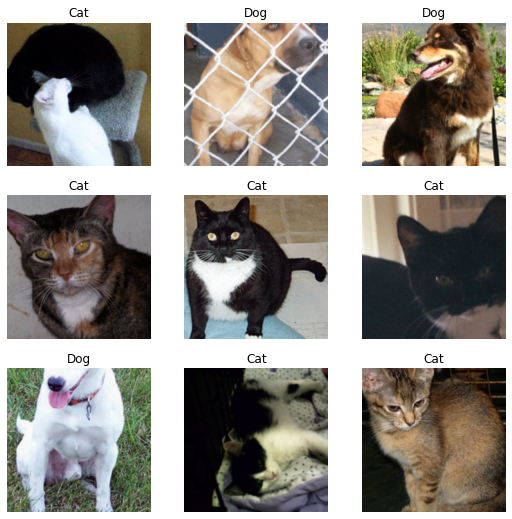

In [41]:
dls.show_batch()

In [66]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)


In [67]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.087182,0.048325,0.984797,2:32:13


epoch,train_loss,valid_loss,accuracy,time
0,0.056301,0.036822,0.987397,2:52:35
1,0.042777,0.031331,0.988998,3:04:12
2,0.026167,0.021325,0.991998,3:24:21
3,0.010747,0.025651,0.991998,2:50:55


In [58]:
dls.vocab

['Cat', 'Dog']

In [68]:
learn.save('cats_vs_dogs') # save model 
from fastai.vision.all import load_learner

# load model
learn = load_learner('models/cats_vs_dogs.pth')
learn.load('cats_vs_dogs')

Path('models/cats_vs_dogs.pth')

In [69]:
learn.load('cats_vs_dogs') #load model

In [71]:
# Path to a new Image
image_path = 'E:\FirstSteP\WAdKO\dog.jpg'

# Upload new Img
img = PILImage.create(image_path)

# Prediction
pred, _, _ = learn.predict(img)
print(pred)

Dog
